<a href="https://colab.research.google.com/github/fmarotta/PBoC_2023/blob/main/elephants_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# The necessary library imports we will use in this tutorial.
# Each will be described as we use their functions
import numpy as np # For numeric computing
import matplotlib.pyplot as plt # For generating plots
import skimage.io # For image reading and manipulation
import skimage.color # For processing color images
import skimage.filters # For filtering images
import skimage.measure # For measuring properties of objects in images
import seaborn as sns # For making plots prettier
sns.set()

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [12]:
# Load the image of elephants around a watering hole
image = skimage.io.imread("https://www.rpgroup.caltech.edu/embl_pboc_2023/datasets/Elephants2.jpg")
image


array([[[ 60,  62,  61],
        [ 77,  76,  71],
        [ 72,  71,  67],
        ...,
        [111, 107,  96],
        [103,  99,  90],
        [106, 102,  91]],

       [[ 53,  57,  56],
        [ 71,  70,  66],
        [ 65,  66,  61],
        ...,
        [ 97,  97,  89],
        [ 99,  96,  87],
        [110, 106,  95]],

       [[ 64,  65,  60],
        [ 53,  58,  54],
        [ 55,  56,  58],
        ...,
        [ 93,  93,  81],
        [ 88,  88,  78],
        [ 93,  93,  85]],

       ...,

       [[103,  83,  72],
        [117,  95,  84],
        [117,  94,  86],
        ...,
        [ 89,  86,  77],
        [ 97,  95,  83],
        [ 75,  77,  66]],

       [[132, 108,  96],
        [123, 101,  90],
        [111,  89,  78],
        ...,
        [ 87,  85,  73],
        [ 94,  92,  80],
        [ 84,  81,  72]],

       [[141, 115, 102],
        [124, 102,  91],
        [117,  95,  84],
        ...,
        [ 80,  80,  70],
        [ 87,  84,  75],
        [ 87,  84,  75]]

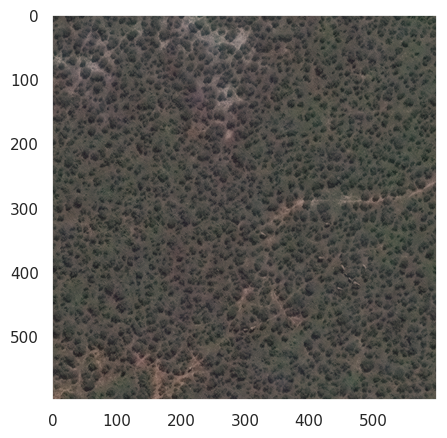

In [18]:
figure, axis = plt.subplots(nrows=1, ncols=1, figsize=[5, 5])
axis.imshow(image)
axis.grid(False)

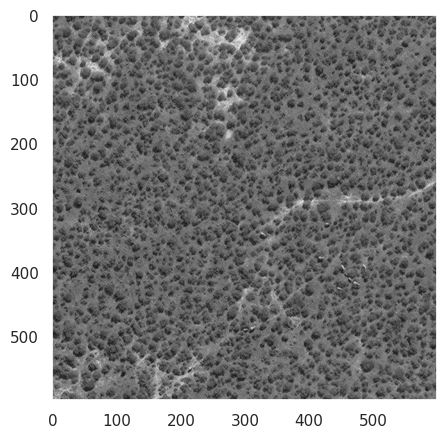

In [49]:
image_grey = skimage.color.rgb2gray(image)
image_grey
figure, axis = plt.subplots(nrows=1, ncols=1, figsize=[5, 5])
axis.imshow(image_grey, cmap="gray")
axis.grid(False)

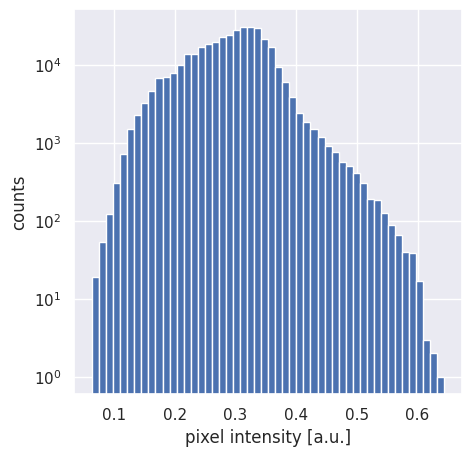

In [23]:
figure, axis = plt.subplots(nrows=1, ncols=1, figsize=[5, 5])
axis.hist(image_grey.flatten(), bins=50)
axis.set_xlabel("pixel intensity [a.u.]")
axis.set_ylabel("counts")
axis.set_yscale("log")

In [86]:
def plot_image(image, cmap="gray", **kwargs):
  figure, axis = plt.subplots(nrows=1, ncols=1, figsize=[5, 5])
  axis.imshow(image, cmap=cmap, **kwargs)
  axis.grid(False)
  return figure, axis

def plot_hist(image, **kwargs):
  figure, axis = plt.subplots(nrows=1, ncols=1, figsize=[5, 5])
  axis.hist(image.flatten(), bins=50, **kwargs)
  axis.set_yscale("log")
  return figure, axis

array([[0.31532471, 0.45926902, 0.35480824, 0.16862745, 0.21736078,
        0.20532824],
       [0.39010235, 0.44719882, 0.55334902, 0.3662902 , 0.2190502 ,
        0.21512078],
       [0.30945373, 0.39402392, 0.52589804, 0.55727059, 0.28736078,
        0.18095765],
       [0.23276431, 0.3928851 , 0.4628851 , 0.62337176, 0.42033608,
        0.20335608],
       [0.21736078, 0.27559608, 0.34668235, 0.55727059, 0.51189333,
        0.3352302 ],
       [0.24255686, 0.16105216, 0.23670078, 0.41249294, 0.52365804,
        0.44777216],
       [0.21260588, 0.23863529, 0.18066   , 0.27390667, 0.45896353,
        0.45504196],
       [0.17311451, 0.17842   , 0.18066   , 0.19412902, 0.38225922,
        0.45618078]])

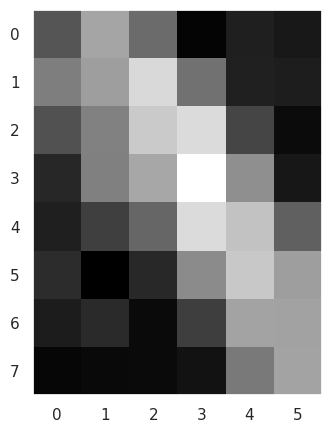

In [87]:
image_zoom = image_grey[389:397, 450:456]
plot_image(image_zoom, cmap="gray")
image_zoom

(<Figure size 500x500 with 1 Axes>, <Axes: >)

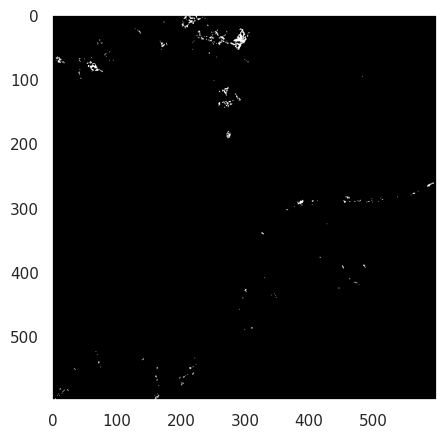

In [65]:
image_thresh = image_grey > 0.5
plot_image(image_thresh, cmap="gray")


(<Figure size 500x500 with 1 Axes>, <Axes: >)

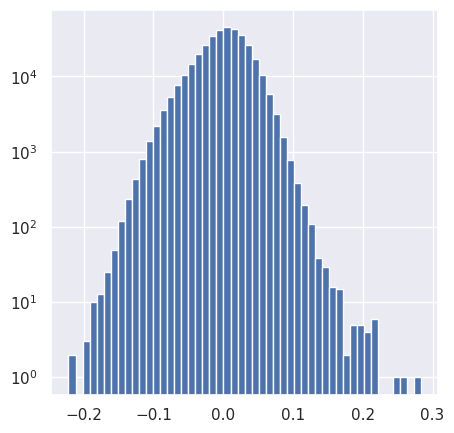

In [80]:
background = skimage.filters.gaussian(image_grey, sigma=1.9)
# plot_image(background)
image_filtered = image_grey - background
# plot_image(image_filtered)
plot_hist(image_filtered)

(<Figure size 500x500 with 1 Axes>, <Axes: >)

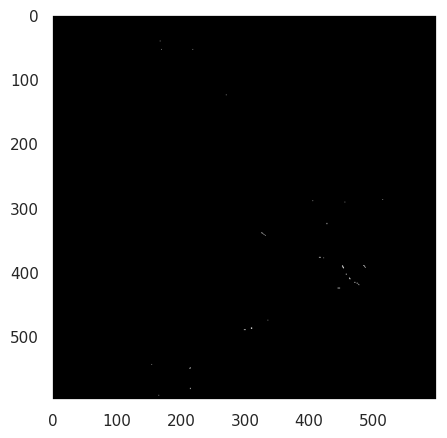

In [81]:
image_filtered_thresh = image_filtered > 0.15
plot_image(image_filtered_thresh)

(<Figure size 500x500 with 1 Axes>, <Axes: >)

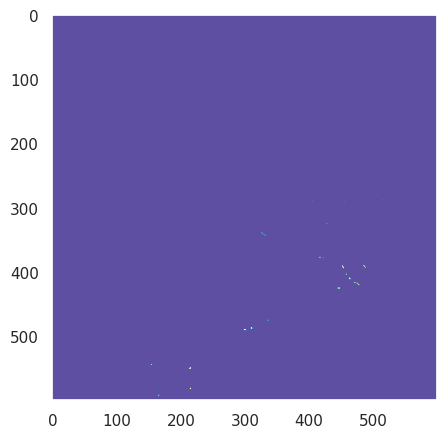

In [90]:
image_labeled = skimage.measure.label(image_filtered_thresh)
plot_image(image_labeled, cmap="Spectral_r")

In [98]:
objects_count = image_labeled.max()
print("Number of elephants identified:", objects_count)

Number of elephants identified: 27


In [115]:
sum(image_labeled.flatten() == 8)

2

(array([11.,  7.,  0.,  3.,  0.,  4.,  1.,  0.,  0.,  1.]),
 array([0.09 , 0.144, 0.198, 0.252, 0.306, 0.36 , 0.414, 0.468, 0.522,
        0.576, 0.63 ]),
 <BarContainer object of 10 artists>)

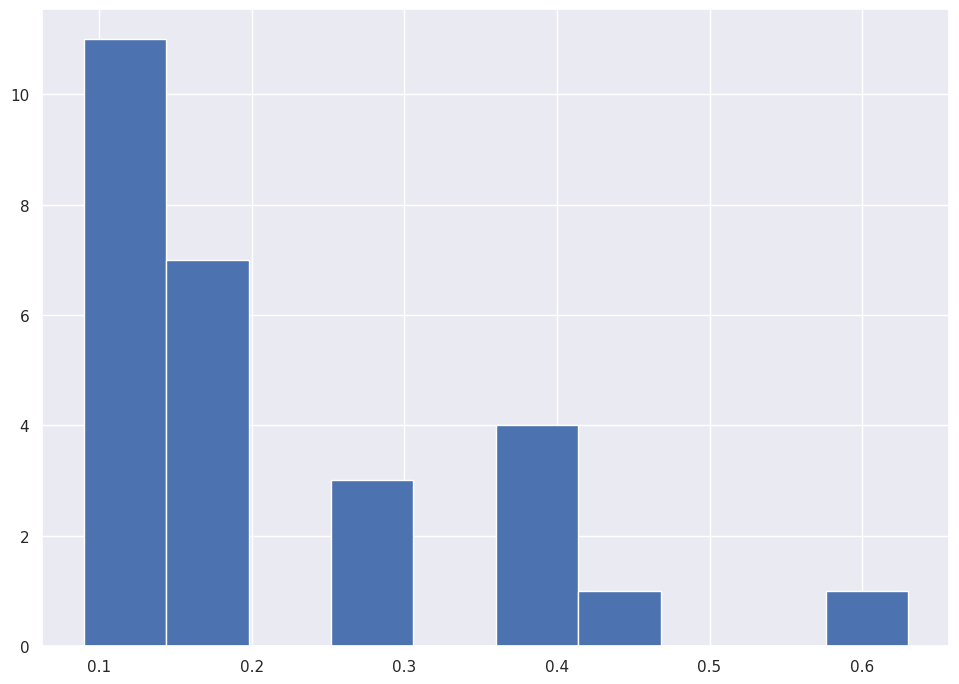

In [120]:
# We know each pixel is 0.09 m^2
objects_sizes = [np.count_nonzero(image_labeled == i) * 0.0
                 for i in range(1, objects_count + 1)]
plt.hist(objects_sizes)

16


(<Figure size 500x500 with 1 Axes>, <Axes: >)

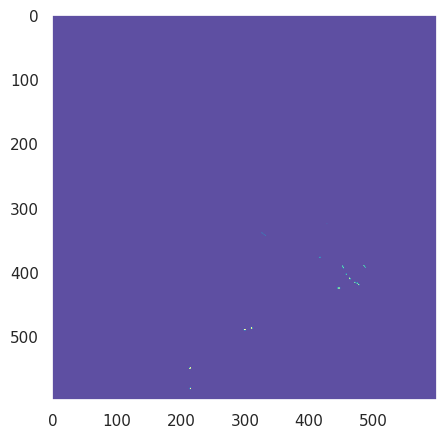

In [129]:
elephants = np.zeros_like(image_labeled)
i = 1
for l in range(objects_count):
  if objects_sizes[l] >= 0.15:
    elephants[image_labeled == l + 1] = i
    i += 1

plot_image(elephants, cmap="Spectral_r")

In [133]:
properties = skimage.measure.regionprops(elephants)
elephants_count = elephants.max()
x_coordinates = np.zeros(elephants_count)
y_coordinates = np.zeros(elephants_count)
for i in range(elephants_count):
  centroid = properties[i].centroid
  x_coordinates[i] = centroid[1]
  y_coordinates[i] = centroid[0]

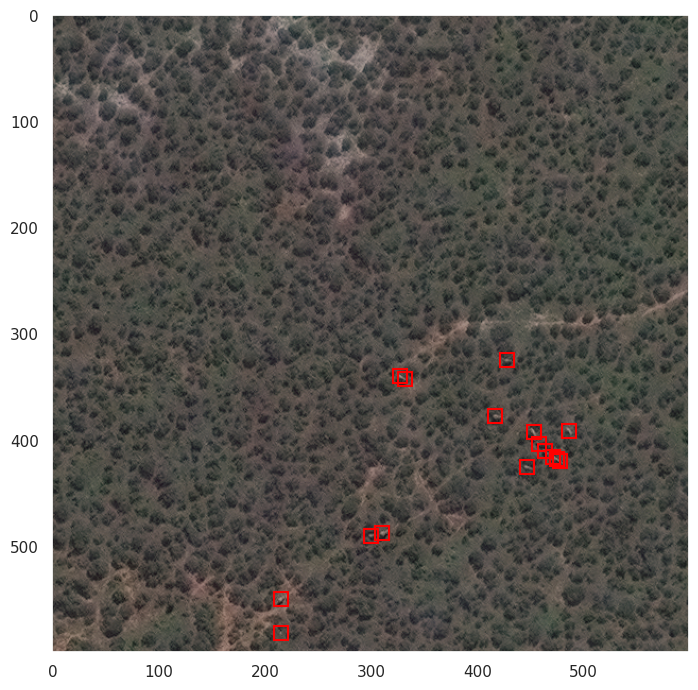

In [140]:
figure, axis = plt.subplots(1, 1)
axis.imshow(image)
axis.plot(
    x_coordinates,
    y_coordinates,
    linewidth=0,
    marker="s",
    markerfacecolor="none",
    markeredgecolor="red",
    markersize=10,
    markeredgewidth=1.5)
axis.grid(False)